# Eda

In [9]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv",  sep = ";")

total_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
total_data["quality"].unique()





array([5, 6, 7, 4, 8, 3])

In [11]:
mapa= {3:0, 4: 0,  5: 1, 6: 1, 7: 2, 8: 2}
total_data['label'] = total_data['quality'].map(mapa)

print(total_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [14]:
total_data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [15]:
total_data["label"].value_counts()

label
1    1319
2     217
0      63
Name: count, dtype: int64

In [17]:
print(total_data.shape)
total_data.info()

(1599, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  label                 1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [18]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)

X = total_data.drop(columns=["quality", "label"])  # Variables predictoras
y = total_data["label"]  # Variable objetivo

# Dividir en conjunto de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Escalar las características

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [20]:
# Entrenamiento del modelo KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = knn.predict(X_test_scaled)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nExactitud del modelo:", accuracy_score(y_test, y_pred))

Matriz de confusión:
[[  0  11   0]
 [  1 250  11]
 [  0  27  20]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      0.95      0.91       262
           2       0.65      0.43      0.51        47

    accuracy                           0.84       320
   macro avg       0.50      0.46      0.47       320
weighted avg       0.81      0.84      0.82       320


Exactitud del modelo: 0.84375


K=1, Error Rate=0.15312499999999996
K=2, Error Rate=0.19374999999999998
K=3, Error Rate=0.16562500000000002
K=4, Error Rate=0.15000000000000002
K=5, Error Rate=0.15625
K=6, Error Rate=0.15000000000000002
K=7, Error Rate=0.15312499999999996
K=8, Error Rate=0.15937500000000004
K=9, Error Rate=0.15937500000000004
K=10, Error Rate=0.15625
K=11, Error Rate=0.15937500000000004
K=12, Error Rate=0.15312499999999996
K=13, Error Rate=0.15312499999999996
K=14, Error Rate=0.14375000000000004
K=15, Error Rate=0.14375000000000004
K=16, Error Rate=0.16874999999999996
K=17, Error Rate=0.16874999999999996
K=18, Error Rate=0.171875
K=19, Error Rate=0.16562500000000002
K=20, Error Rate=0.17812499999999998


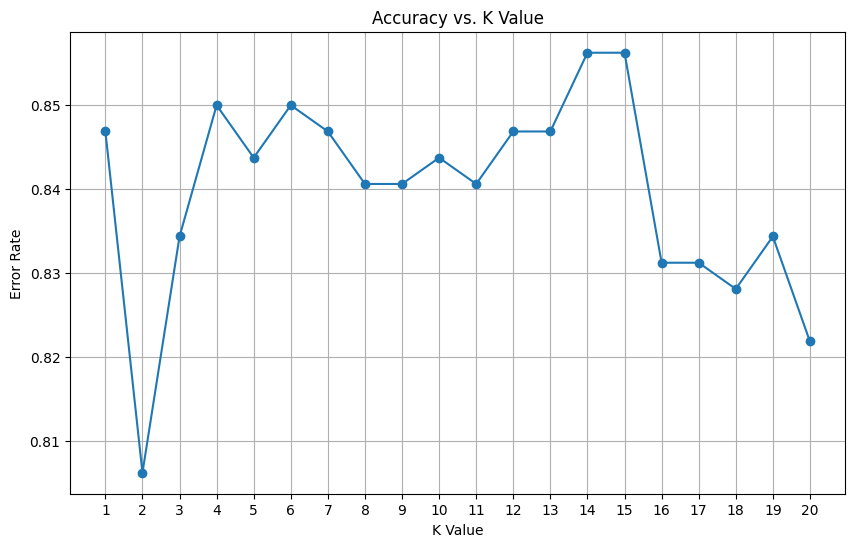

In [23]:
# Optimización de k para probar diferentes valores de k

import matplotlib.pyplot as plt

accuracy_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    error_rate = 1 - accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))
    print(f'K={k}, Error Rate={error_rate}')
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))
plt.grid()
plt.show()  

In [24]:
# Mejor valor de k basado en la exactitud
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print(f'Mejor valor de k: {best_k} con una exactitud de {max(accuracy_scores)}')

Mejor valor de k: 14 con una exactitud de 0.85625


In [25]:
# Entrenar el modelo KNN

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred_best = knn.predict(X_test_scaled)

In [26]:
# Guardar el modelo entrenado

from pickle import dump 

dump(knn, open('knn_model_k_14.pkl', 'wb'))


In [3]:
# Función para predecir la calidad del vino

def predict_wine_quality(features):
    import numpy as np
    from pickle import load
    from sklearn.preprocessing import StandardScaler

    # Cargar el modelo entrenado
    knn_model = load(open('knn_model_k_14.pkl', 'rb'))

    # Escalar las características de entrada
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform([features])

    # Realizar la predicción
    prediction = knn_model.predict(features_scaled)

    if prediction[0] == 0:
        print("La calidad del vino es baja")
    elif prediction[0] == 1:
        print("La calidad del vino es media")
    else:
        print("La calidad del vino es alta")

    return prediction[0]  # Retornar la etiqueta predicha

In [4]:
predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4])

La calidad del vino es media


np.int64(1)